In [2]:
import os
import cv2
import matplotlib.pyplot as plt

Data Augmentation Techniques. Flipping, Rotation

In [6]:
def flip_image_and_show(img):
    # flip vertical
    img_v = cv2.flip(img, 0)
    #show_image_plt(onion_sq_v)

    #flip horizontal
    img_h = cv2.flip(img, 1)
    #show_image_plt(onion_sq_h)

    #flip vertical + horizontal
    img_vh = cv2.flip(img, -1)
    #show_image_plt(onion_sq_vh)

    fig, axarr = plt.subplots(2, 2) #1 row, 3 cols
    fig.tight_layout(h_pad=4)
    axarr[0][0].imshow(img)
    axarr[0][0].set_title("Original")
    axarr[0][1].imshow(img_v)
    axarr[0][1].set_title("Flip Vertical")
    axarr[1][0].imshow(img_h)
    axarr[1][0].set_title("Flip Horizontal")
    axarr[1][1].imshow(img_vh)
    axarr[1][1].set_title("Flip Vertical + Horizontal")
    fig.suptitle('Flipped Images')
    plt.subplots_adjust(top = 0.85)


def rotate_image_and_show(img):
    # rotate 90 degree clockwise
    img_r90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    #show_image_plt(onion_sq_v)
    
    #rotate 180 degree
    img_r180 = cv2.rotate(img, cv2.ROTATE_180)
    #show_image_plt(onion_sq_h)

    #rotate 90 degree counterclockwise
    img_rcw90 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #show_image_plt(onion_sq_vh)

    fig, axarr = plt.subplots(2, 2) #2 row, 2 cols
    fig.tight_layout(h_pad=4)

    axarr[0][0].imshow(img)
    axarr[0][0].set_title("Original")
    axarr[0][1].imshow(img_r90)
    axarr[0][1].set_title("+ 90")
    axarr[1][0].imshow(img_r180)
    axarr[1][0].set_title("+ 180")
    axarr[1][1].imshow(img_rcw90)
    axarr[1][1].set_title("- 90")

    fig.suptitle('Rotated Images')
    plt.subplots_adjust(top = 0.85)

Resize Image to square format. Currently 256x256

In [5]:
def resize_to_square(vegi_bgr):
    img_size = 256
    height, width = vegi_bgr.shape[:2]
    a1 = width / height
    a2 = height / width

    if (a1 > a2):
        r_img = cv2.resize(vegi_bgr, (round(img_size * a1), img_size), interpolation = cv2.INTER_AREA)
        margin = int(r_img.shape[1]/6)
        resized_img = r_img[0:img_size, margin:(margin+img_size)]

    elif(a1 < a2):
        # if height greater than width
        r_img = cv2.resize(vegi_bgr, (img_size, round(img_size * a2)), interpolation = cv2.INTER_AREA)
        margin = int(r_img.shape[0]/6)
        resized_img = r_img[margin:(margin+img_size), 0:img_size]

    elif(a1 == a2):
        # if height and width are equal
        r_img = cv2.resize(vegi_bgr, (img_size, round(img_size * a2)), interpolation = cv2.INTER_AREA)
        resized_img = r_img[0:img_size, 0:img_size]

    if(resized_img.shape[0] != img_size or resized_img.shape[1] != img_size):
        resized_img = r_img[0:img_size, 0:img_size]

    return resized_img

In [58]:
folders = ["Zwiebel_Trieb"]
path = []
# Read from C:
for fold in folders:
    for fname in os.listdir(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/{fold}"):
        path.append(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/{fold}/{fname}")

In [59]:
#split path
path

['D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_1.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_10.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_100.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_101.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_102.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_103.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_104.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_105.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_106.jpg',
 'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Zwiebel_Trieb/zwiebel_trieb_107.jpg',
 'D:/Dokumente/Master-S

In [60]:
j = 1
for i, path in enumerate(path):
    #print(f"++++++++++++++++++++NEW IMAGE +++++++++++++++++++++++\n")
    #print(path)
    if 'desktop.ini' in path:
        continue
    vegi_label = "Zwiebel_Trieb" #should be the folder name
 
    vegi_BGR = cv2.imread(path) # As BGR
    vegi_sq_BGR_original = resize_to_square(vegi_BGR) # BGR
    vegi_sq_RGB = cv2.cvtColor(vegi_sq_BGR_original, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/{vegi_label}/{vegi_label.lower()}_{j}.jpg", cv2.cvtColor(vegi_sq_RGB, cv2.COLOR_BGR2RGB))
    j += 1
    # Horizontal Flip orig
    vegi_sq_RGB_original_v = cv2.flip(vegi_sq_RGB, 1)
    cv2.imwrite(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/{vegi_label}/{vegi_label.lower()}_{j}.jpg", cv2.cvtColor(vegi_sq_RGB_original_v, cv2.COLOR_BGR2RGB))
    j += 1
    # Rotate orig 90 clockwise
    vegi_sq_RGB_rotate = cv2.rotate(vegi_sq_RGB, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/{vegi_label}/{vegi_label.lower()}_{j}.jpg", cv2.cvtColor(vegi_sq_RGB_rotate, cv2.COLOR_BGR2RGB))
    j += 1
    # Horizontal Flip of rotated 90 clockwise
    vegi_sq_RGB_original_v_2 = cv2.flip(vegi_sq_RGB_rotate, 1)
    cv2.imwrite(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/{vegi_label}/{vegi_label.lower()}_{j}.jpg", cv2.cvtColor(vegi_sq_RGB_original_v_2, cv2.COLOR_BGR2RGB))
    j += 1
    #
    vegi_sq_RGB_rotate_2 = cv2.rotate(vegi_sq_RGB_rotate, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/{vegi_label}/{vegi_label.lower()}_{i}.jpg", cv2.cvtColor(vegi_sq_RGB_rotate_2, cv2.COLOR_BGR2RGB))
    j += 1

    vegi_sq_RGB_original_v_3 = cv2.flip(vegi_sq_RGB_rotate_2, 1)
    cv2.imwrite(f"D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/{vegi_label}/{vegi_label.lower()}_{i}.jpg", cv2.cvtColor(vegi_sq_RGB_original_v_3, cv2.COLOR_BGR2RGB))
    j += 1
    

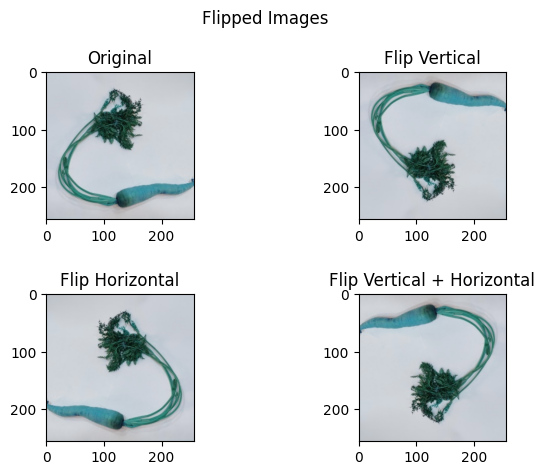

In [7]:
path="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/Karotte_Trieb/Karotte_trieb_1.jpg"
vegi_BGR = cv2.imread(path)
resize_img=resize_to_square(vegi_BGR)
flip_image_and_show(resize_img)


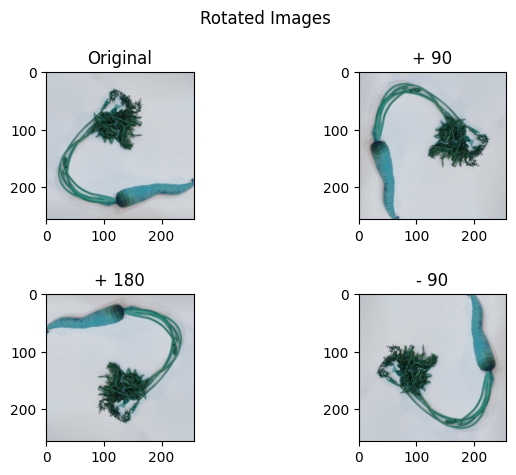

In [8]:
rotate_image_and_show(resize_img)